<a href="https://colab.research.google.com/github/jmperalta89/linkedinJMPERALTA/blob/main/CONVERTIDOR_PDF_EPUB_TO_MOBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CONVERTIDOR DE PDF/EPUB to MOBI

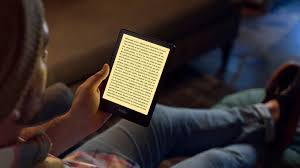

In [ ]:
# Instalamos las dependencias necesarias (ejecutar solo una vez)
!apt-get update && apt-get install -y calibre
!pip install tqdm

In [ ]:
#Bibliotecas
from google.colab import files
import os
from tqdm import tqdm
import time
import mimetypes

##FUNCIONES


In [ ]:

def validar_archivo(nombre_archivo):
    """Valida que el archivo sea PDF o EPUB"""
    extension = nombre_archivo.lower().split('.')[-1]
    extensiones_validas = ['pdf', 'epub']

    if extension not in extensiones_validas:
        raise ValueError(f"El archivo debe ser PDF o EPUB. Extensión detectada: {extension}")

    return True

def simular_progreso(descripcion):
    """Simula una barra de progreso para la conversión"""
    for _ in tqdm(range(100), desc=descripcion, ncols=100):
        time.sleep(0.1)

def convertir_a_mobi(archivo_entrada):
    try:
        # Validar el archivo
        validar_archivo(archivo_entrada)

        # Obtener el nombre base del archivo sin extensión
        nombre_base = os.path.splitext(archivo_entrada)[0]
        archivo_salida = nombre_base + '.mobi'

        print(f"\n📚 Iniciando conversión de {archivo_entrada}...")

        # Mostrar barra de progreso durante la conversión
        simular_progreso("Convirtiendo")

        # Usar ebook-convert para la conversión
        !ebook-convert "{archivo_entrada}" "{archivo_salida}"

        print(f"\n✅ Conversión completada: {archivo_salida}")

        # Descargar el archivo convertido
        print("\n📥 Descargando archivo convertido...")
        files.download(archivo_salida)

    except ValueError as e:
        print(f"\n❌ Error: {str(e)}")
    except Exception as e:
        print(f"\n❌ Error durante la conversión: {str(e)}")

In [ ]:
# Interfaz principal
print("📁 Por favor, sube tu archivo PDF o EPUB (uno a la vez)")
archivos_subidos = files.upload()

📁 Por favor, sube tu archivo PDF o EPUB (uno a la vez)


Saving Benjamin Graham - El inversor inteligente.epub to Benjamin Graham - El inversor inteligente.epub


In [ ]:
# Procesar el archivo subido (tomamos solo el primero si hay múltiples)
if archivos_subidos:
    nombre_archivo = list(archivos_subidos.keys())[0]
    convertir_a_mobi(nombre_archivo)
else:
    print("❌ No se subió ningún archivo")